# **Data Cuaca Delhi**

Dataset ini berinformasi tentang cuaca harian di Delhi, India tahun 2013-2016 yang terdiri dari 5 variabel yaitu:

1.   Date : dengan format harian
2.   Meantemp : suhu rata-rata harian (C)
3.   Humidity : kelembaban udara rata-rata harian (%)
4.   Wind_speed : kecepatan angin rata-rata harian (km/jam)
5.   meanpressure : tekanan udara rata-rata harian (hectopascal)

Pada latihan kali ini digunakan 2 variabel yaitu 'date' dan 'meantemp'pada tahun 2015-2016




In [ ]:
#memanggil packages yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/DailyDelhiClimateTrain.csv')

In [ ]:
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
#memeriksa tipe data
df.dtypes

,0
date,object
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [ ]:
#mengubah tipe data 'date' menjadi datetime
df.date=pd.to_datetime(df.date)

In [ ]:
#menampilkan banyak data
len(df)

1462

In [ ]:
#mengambil data tahun 2015 dan 2016
df_2015_2016 = df[(df['date'].dt.year == 2015) | (df['date'].dt.year == 2016)]

In [ ]:
len(df_2015_2016)

731

In [ ]:
df_2015_2016.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
730,2015-01-01,14.750,72.000,0.9250,1017.500
731,2015-01-02,14.875,96.625,3.0125,1017.875
732,2015-01-03,15.125,92.000,0.9250,1017.375
733,2015-01-04,14.125,78.750,9.5125,1019.625
734,2015-01-05,14.000,69.375,15.0500,1016.000
735,2015-01-06,12.000,79.875,4.4000,1015.500
736,2015-01-07,9.625,86.000,3.9375,1016.625
737,2015-01-08,10.000,87.875,3.4875,1019.125
738,2015-01-09,10.625,80.625,1.6250,1020.125
739,2015-01-10,11.125,73.125,4.4125,1018.875


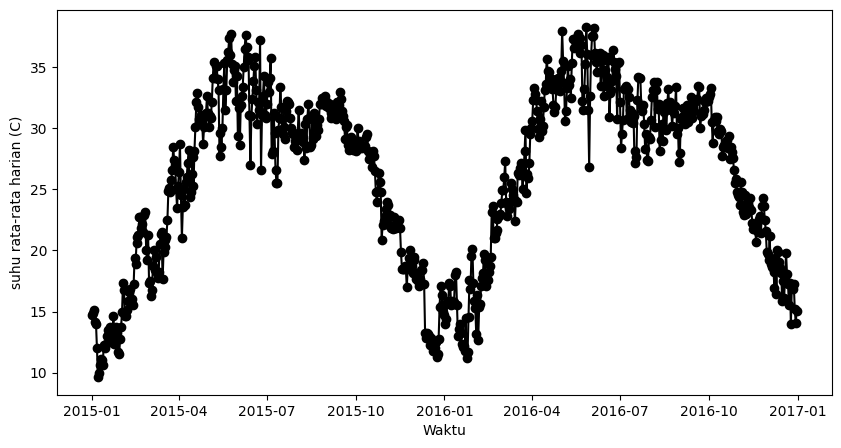

In [ ]:
#menampilkan plot deret waktu dari data
plt.figure(figsize=(10,5))
plt.plot(df_2015_2016.date,df_2015_2016.meantemp,'-ok')
plt.xlabel('Waktu'), plt.ylabel('suhu rata-rata harian (C)')
plt.show()

Plot di atas menggambarkan suhu rata-rata harian di Delhi tahun 2015-2016. Terlihat bahwa pola bersifat musiman dimana pola berulang setiap tahun. Pada bulan Januari hingga Mei suhu rata-rata semakin meningkat hingga memuncak di sekitar bulan Juni dan Juli melebihi 35 derajat Celcius. Namun setelahnya, pada bulan Juli - Desember  menurun secara bertahap.



*   Tidak stasioner dalam nilai tengah (Mean) . Rata-rata suhu berubah secara signfikan sepanjang tahun karena ada pola / kecenderungan naik lalu turun.
*  Ada kestasioneran pada ragam karena variabilitas suhu tidak berubah secara drastis sepanjang waktu. Osilasi suhu yang terjadi relatif konsisten dalam rentang tertentu.




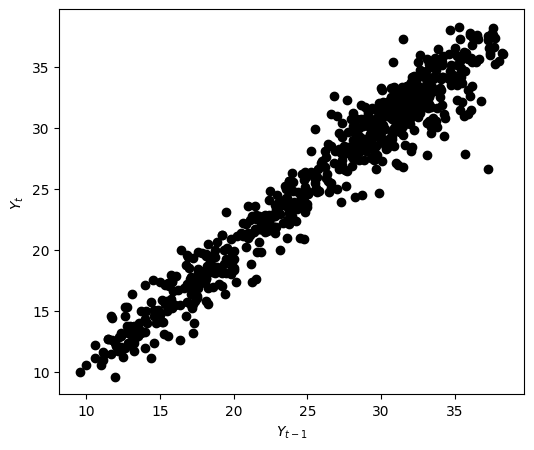

In [ ]:
#menampilkan scatter plot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df_2015_2016.meantemp, lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Berdasarkan scatterplot di atas terlihat bahwa ada korelasi positif yang kuat antara suhu hari ini (Yt) dan suhu kemarin (Yt-1) yang artinya jika suhu kemarin tinggi, kemungkinan besar suhu hari ini juga tinggi begitu pula sebaliknya.

Korelasi yang kuat ini menunjukkan adanya autokrelasi dalam data 'meantemp' yang merupakan karakteristik umum dalam data time series.

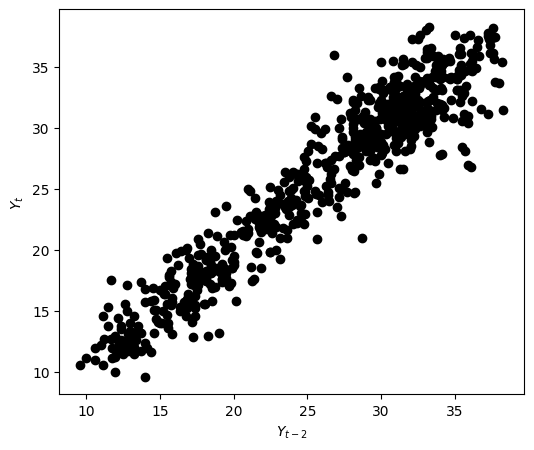

In [ ]:

#menampilkan scatter plot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df_2015_2016.meantemp, lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Ketika kita mencoba menggambarkan perbedaan 2 hari (lag = 2) ternyata masih ada korelasi yang kuat antara suhu hari ini (Yt) dan suhu 2 hari yang lalu (Yt-2)

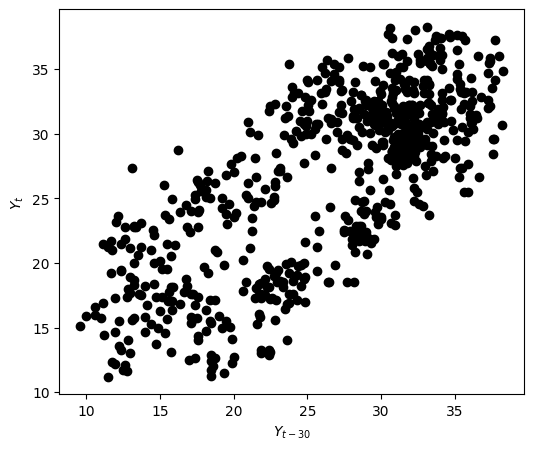

In [ ]:
#menampilkan scatter plot antara Yt dan Yt-30
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df_2015_2016.meantemp, lag=30, c='k')
plt.xlabel(r'$Y_{t-30}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Setelah dilakukan beberapa kali percobaan hingga lag 30 kita dapat menyimpulkan bahwa masih ada korelasi positif antara suhu pada bulan ini dan bulan sebelumnya.

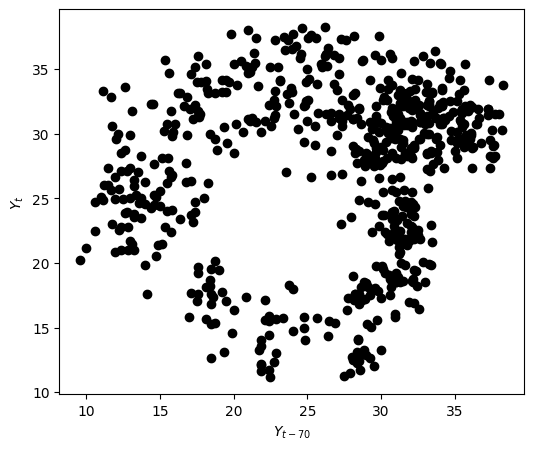

In [ ]:
#menampilkan scatter plot antara Yt dan Yt-55
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df_2015_2016.meantemp, lag=70, c='k')
plt.xlabel(r'$Y_{t-70}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

dari scatter plot di atas dengan lag = 70 telihat bahwa hubungan antara Yt dan Yt-70 tidak lagi ada hubungan linear. sehingga suhu hari ini tidak lagi memiliki hubungan yang jelas dengan suhu 70 hari yang lalu.

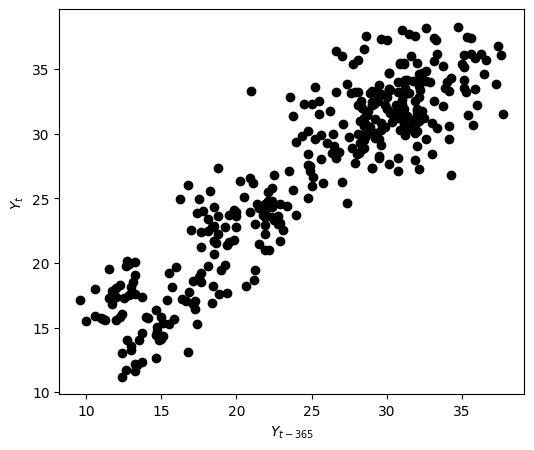

In [ ]:
#menampilkan scatter plot antara Yt dan Yt-365
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df_2015_2016.meantemp, lag=365, c='k')
plt.xlabel(r'$Y_{t-365}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Karena pola ini musiman tiap tahunnya sehingga ketika digambarkan plot dengan lag=365 maka membentuk pola linier dan ada korelasi kuat antara tahun kemarin dan tahun ini pada bulan yang sama, misalnya pada bulan Januari 2015 dan bulan Januari 2016 Suhu di Delhi relatif sama.